# Essais de segmentation

In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75316 entries, 0 to 75315
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         75316 non-null  object 
 1   avg_delivery_time_days     75316 non-null  float64
 2   days_since_last_order      75316 non-null  float64
 3   total_spent                75316 non-null  float64
 4   avg_review_score           75316 non-null  float64
 5   max_delivery_delay_days    75316 non-null  float64
 6   has_comment                75316 non-null  int64  
 7   last_payment_type          75316 non-null  object 
 8   last_payment_installments  75316 non-null  float64
 9   avg_spent_per_order        75316 non-null  float64
 10  avg_days_between_orders    75316 non-null  float64
 11  loyalty_score              75316 non-null  float64
 12  more_than_one_order        75316 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usag

## Normalisation des données

In [4]:
# Normalisation de la colonne 'more_than_one_order'
from sklearn.preprocessing import StandardScaler

# Initialisation du StandardScaler
scaler = StandardScaler()

# Fit et transformation de la colonne 'more_than_one_order'
df['more_than_one_order_normalized'] = scaler.fit_transform(df[['more_than_one_order']])





In [5]:
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,more_than_one_order,more_than_one_order_normalized
24065,520af1e295c9d6d6dc0413afa815b0b9,15.955174,309.129641,42.69,5.0,0.0,0,credit_card,1.0,42.69,309.129641,0.137652,0,-0.108668
12241,29b6326328c6202c2174b62bc41a5117,12.108368,191.873322,155.98,3.0,0.0,1,credit_card,3.0,155.98,191.873322,0.808717,0,-0.108668
50643,ac28756ae14e9bab4d0da284e2ed0724,9.080150,392.935289,170.03,3.0,0.0,0,credit_card,1.0,170.03,392.935289,0.431619,0,-0.108668
22494,4cc442b5cc7d361e4da6bf55b07fe23f,13.143484,151.105822,98.39,2.0,0.0,1,credit_card,2.0,98.39,151.105822,0.646852,0,-0.108668
60249,cc897bc108f9404a53b73166e7e63858,6.061343,496.216366,148.86,5.0,0.0,1,other,1.0,148.86,496.216366,0.299387,0,-0.108668
46008,9c83f21126fe233bad5a62397cbc77aa,3.456146,223.460729,287.12,2.0,0.0,0,credit_card,1.0,287.12,223.460729,1.279155,0,-0.108668
25277,561c55720d6ad810863839fea8f32329,10.071887,72.107002,36.42,5.0,0.0,1,credit_card,1.0,36.42,72.107002,0.498174,0,-0.108668
48669,a57ab5ea2fcccaeb61d5aeb48b7bc3e7,15.437847,132.323819,104.41,3.0,0.0,1,other,1.0,104.41,132.323819,0.783131,0,-0.108668
4786,1041688b50cfd8ef6df6086a1746a30c,1.880509,49.857014,27.46,5.0,0.0,0,credit_card,2.0,27.46,49.857014,0.539945,0,-0.108668
16242,37466c67c3becb974e230f418df28055,5.927269,77.887431,117.74,5.0,0.0,0,credit_card,5.0,117.74,77.887431,1.492506,0,-0.108668


In [6]:
df.describe()

,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,more_than_one_order,more_than_one_order_normalized
count,75316.000000,75316.000000,75316.000000,75316.000000,75316.0,75316.00000,75316.000000,75316.000000,75316.000000,75316.000000,75316.000000,7.531600e+04
mean,10.481163,287.527577,112.260154,4.315881,0.0,0.38697,2.345411,111.170170,287.428906,0.569039,0.011671,2.141553e-17
std,5.645056,154.148572,71.293699,1.119543,0.0,0.48706,1.897091,70.541817,154.130011,0.605715,0.107400,1.000007e+00
min,0.781366,49.145613,9.590000,1.000000,0.0,0.00000,0.000000,9.590000,32.538976,0.023585,0.000000,-1.086676e-01
25%,6.239271,161.287917,57.430000,4.000000,0.0,0.00000,1.000000,57.100000,161.257998,0.193125,0.000000,-1.086676e-01
50%,9.366563,269.994259,93.300000,5.000000,0.0,0.00000,1.000000,92.500000,269.902894,0.364459,0.000000,-1.086676e-01
75%,13.904986,400.167769,150.980000,5.000000,0.0,1.00000,3.000000,148.770000,400.083672,0.705615,0.000000,-1.086676e-01
max,29.030833,744.364907,350.740000,5.000000,0.0,1.00000,8.000000,350.740000,744.364907,6.313576,1.000000,9.202376e+00


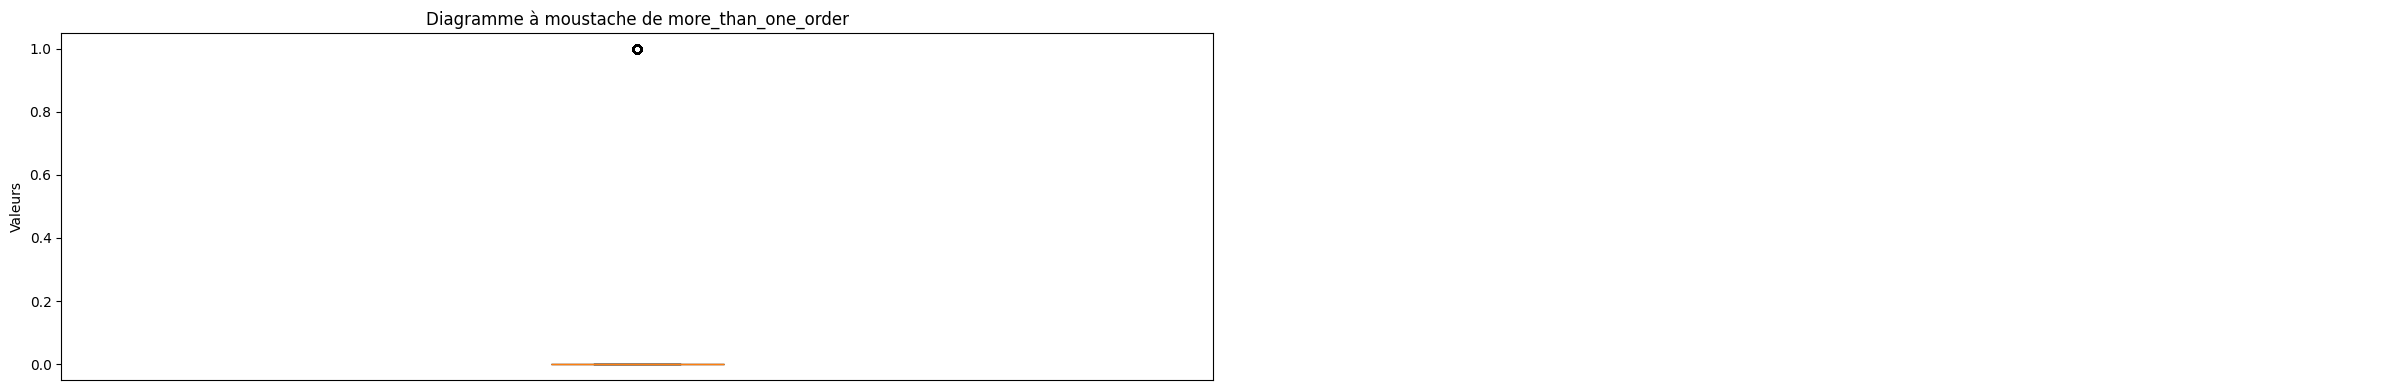

In [7]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['more_than_one_order']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

## Cette normalization sera utile pour aider les modèles de clustering à travailler convenablement.

Nous l'appliquons donc aux autres colonnes numériques :

 2   avg_delivery_time_days  92753 non-null  float64
 3   days_since_last_order   92753 non-null  float64
 4   total_spent             92753 non-null  float64
 5   avg_review_score        92753 non-null  float64

In [8]:
# Fit et transformation de la colonne 'avg_delivery_time_days'
df['avg_delivery_time_days_normalized'] = scaler.fit_transform(df[['avg_delivery_time_days']])

# Fit et transformation de la colonne 'days_since_last_order'
df['days_since_last_order_normalized'] = scaler.fit_transform(df[['days_since_last_order']])

# Fit et transformation de la colonne 'total_spent'
df['total_spent_normalized'] = scaler.fit_transform(df[['total_spent']])

# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

#  6   avg_delivery_delay_days    94269 non-null  float64
#  7   max_delivery_delay_days    94269 non-null  float64
#  8   last_order_status          94269 non-null  object 
#  9   has_comment                94269 non-null  int64  
#  10  last_payment_type          94269 non-null  object 
#  11  last_payment_installments  94269 non-null  float64

# # Fit et transformation de la colonne 'avg_delivery_delay_days'
# df['avg_delivery_delay_days_normalized'] = scaler.fit_transform(df[['avg_delivery_delay_days']])
# # Fit et transformation de la colonne 'max_delivery_delay_days'
df['max_delivery_delay_days_normalized'] = scaler.fit_transform(df[['max_delivery_delay_days']])
# Fit et transformation de la colonne 'has_comment'
df['has_comment_normalized'] = scaler.fit_transform(df[['has_comment']])
# Fit et transformation de la colonne 'last_payment_installments'
df['last_payment_installments_normalized'] = scaler.fit_transform(df[['last_payment_installments']])
# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

#avg_spent_per_order
df['avg_spent_per_order_normalized'] = scaler.fit_transform(df[['avg_spent_per_order']])
#avg_days_between_orders
df['avg_days_between_orders_normalized'] = scaler.fit_transform(df[['avg_days_between_orders']])
#loyalty_score
df['loyalty_score_normalized'] = scaler.fit_transform(df[['loyalty_score']])

# Hotencoding de la colonne 'last_order_status'
# df = pd.get_dummies(df, columns=['last_order_status'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75316 entries, 0 to 75315
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    75316 non-null  object 
 1   avg_delivery_time_days                75316 non-null  float64
 2   days_since_last_order                 75316 non-null  float64
 3   total_spent                           75316 non-null  float64
 4   avg_review_score                      75316 non-null  float64
 5   max_delivery_delay_days               75316 non-null  float64
 6   has_comment                           75316 non-null  int64  
 7   last_payment_type                     75316 non-null  object 
 8   last_payment_installments             75316 non-null  float64
 9   avg_spent_per_order                   75316 non-null  float64
 10  avg_days_between_orders               75316 non-null  float64
 11  loyalty_score  

In [10]:
df.describe()

,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,...,avg_delivery_time_days_normalized,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,avg_spent_per_order_normalized,avg_days_between_orders_normalized,loyalty_score_normalized
count,75316.000000,75316.000000,75316.000000,75316.000000,75316.0,75316.00000,75316.000000,75316.000000,75316.000000,75316.000000,...,7.531600e+04,7.531600e+04,7.531600e+04,7.531600e+04,75316.0,7.531600e+04,7.531600e+04,7.531600e+04,7.531600e+04,7.531600e+04
mean,10.481163,287.527577,112.260154,4.315881,0.0,0.38697,2.345411,111.170170,287.428906,0.569039,...,-1.373141e-16,-2.245329e-16,3.047232e-17,-1.732111e-16,0.0,9.429437e-17,-1.081626e-16,-1.440595e-16,-2.467975e-16,1.446256e-16
std,5.645056,154.148572,71.293699,1.119543,0.0,0.48706,1.897091,70.541817,154.130011,0.605715,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,0.781366,49.145613,9.590000,1.000000,0.0,0.00000,0.000000,9.590000,32.538976,0.023585,...,-1.718293e+00,-1.546453e+00,-1.440111e+00,-2.961837e+00,0.0,-7.945064e-01,-1.236328e+00,-1.440009e+00,-1.653744e+00,-9.005188e-01
25%,6.239271,161.287917,57.430000,4.000000,0.0,0.00000,1.000000,57.100000,161.257998,0.193125,...,-7.514399e-01,-8.189534e-01,-7.690794e-01,-2.821541e-01,0.0,-7.945064e-01,-7.092019e-01,-7.665032e-01,-8.186060e-01,-6.206164e-01
50%,9.366563,269.994259,93.300000,5.000000,0.0,0.00000,1.000000,92.500000,269.902894,0.364459,...,-1.974485e-01,-1.137437e-01,-2.659461e-01,6.110736e-01,0.0,-7.945064e-01,-7.092019e-01,-2.646699e-01,-1.137100e-01,-3.377516e-01
75%,13.904986,400.167769,150.980000,5.000000,0.0,1.00000,3.000000,148.770000,400.083672,0.705615,...,6.065210e-01,7.307297e-01,5.431069e-01,6.110736e-01,0.0,1.258643e+00,3.450510e-01,5.330183e-01,7.309123e-01,2.254798e-01
max,29.030833,744.364907,350.740000,5.000000,0.0,1.00000,8.000000,350.740000,744.364907,6.313576,...,3.286025e+00,2.963637e+00,3.345056e+00,6.110736e-01,0.0,1.258643e+00,2.980683e+00,3.396162e+00,2.964634e+00,9.483950e+00


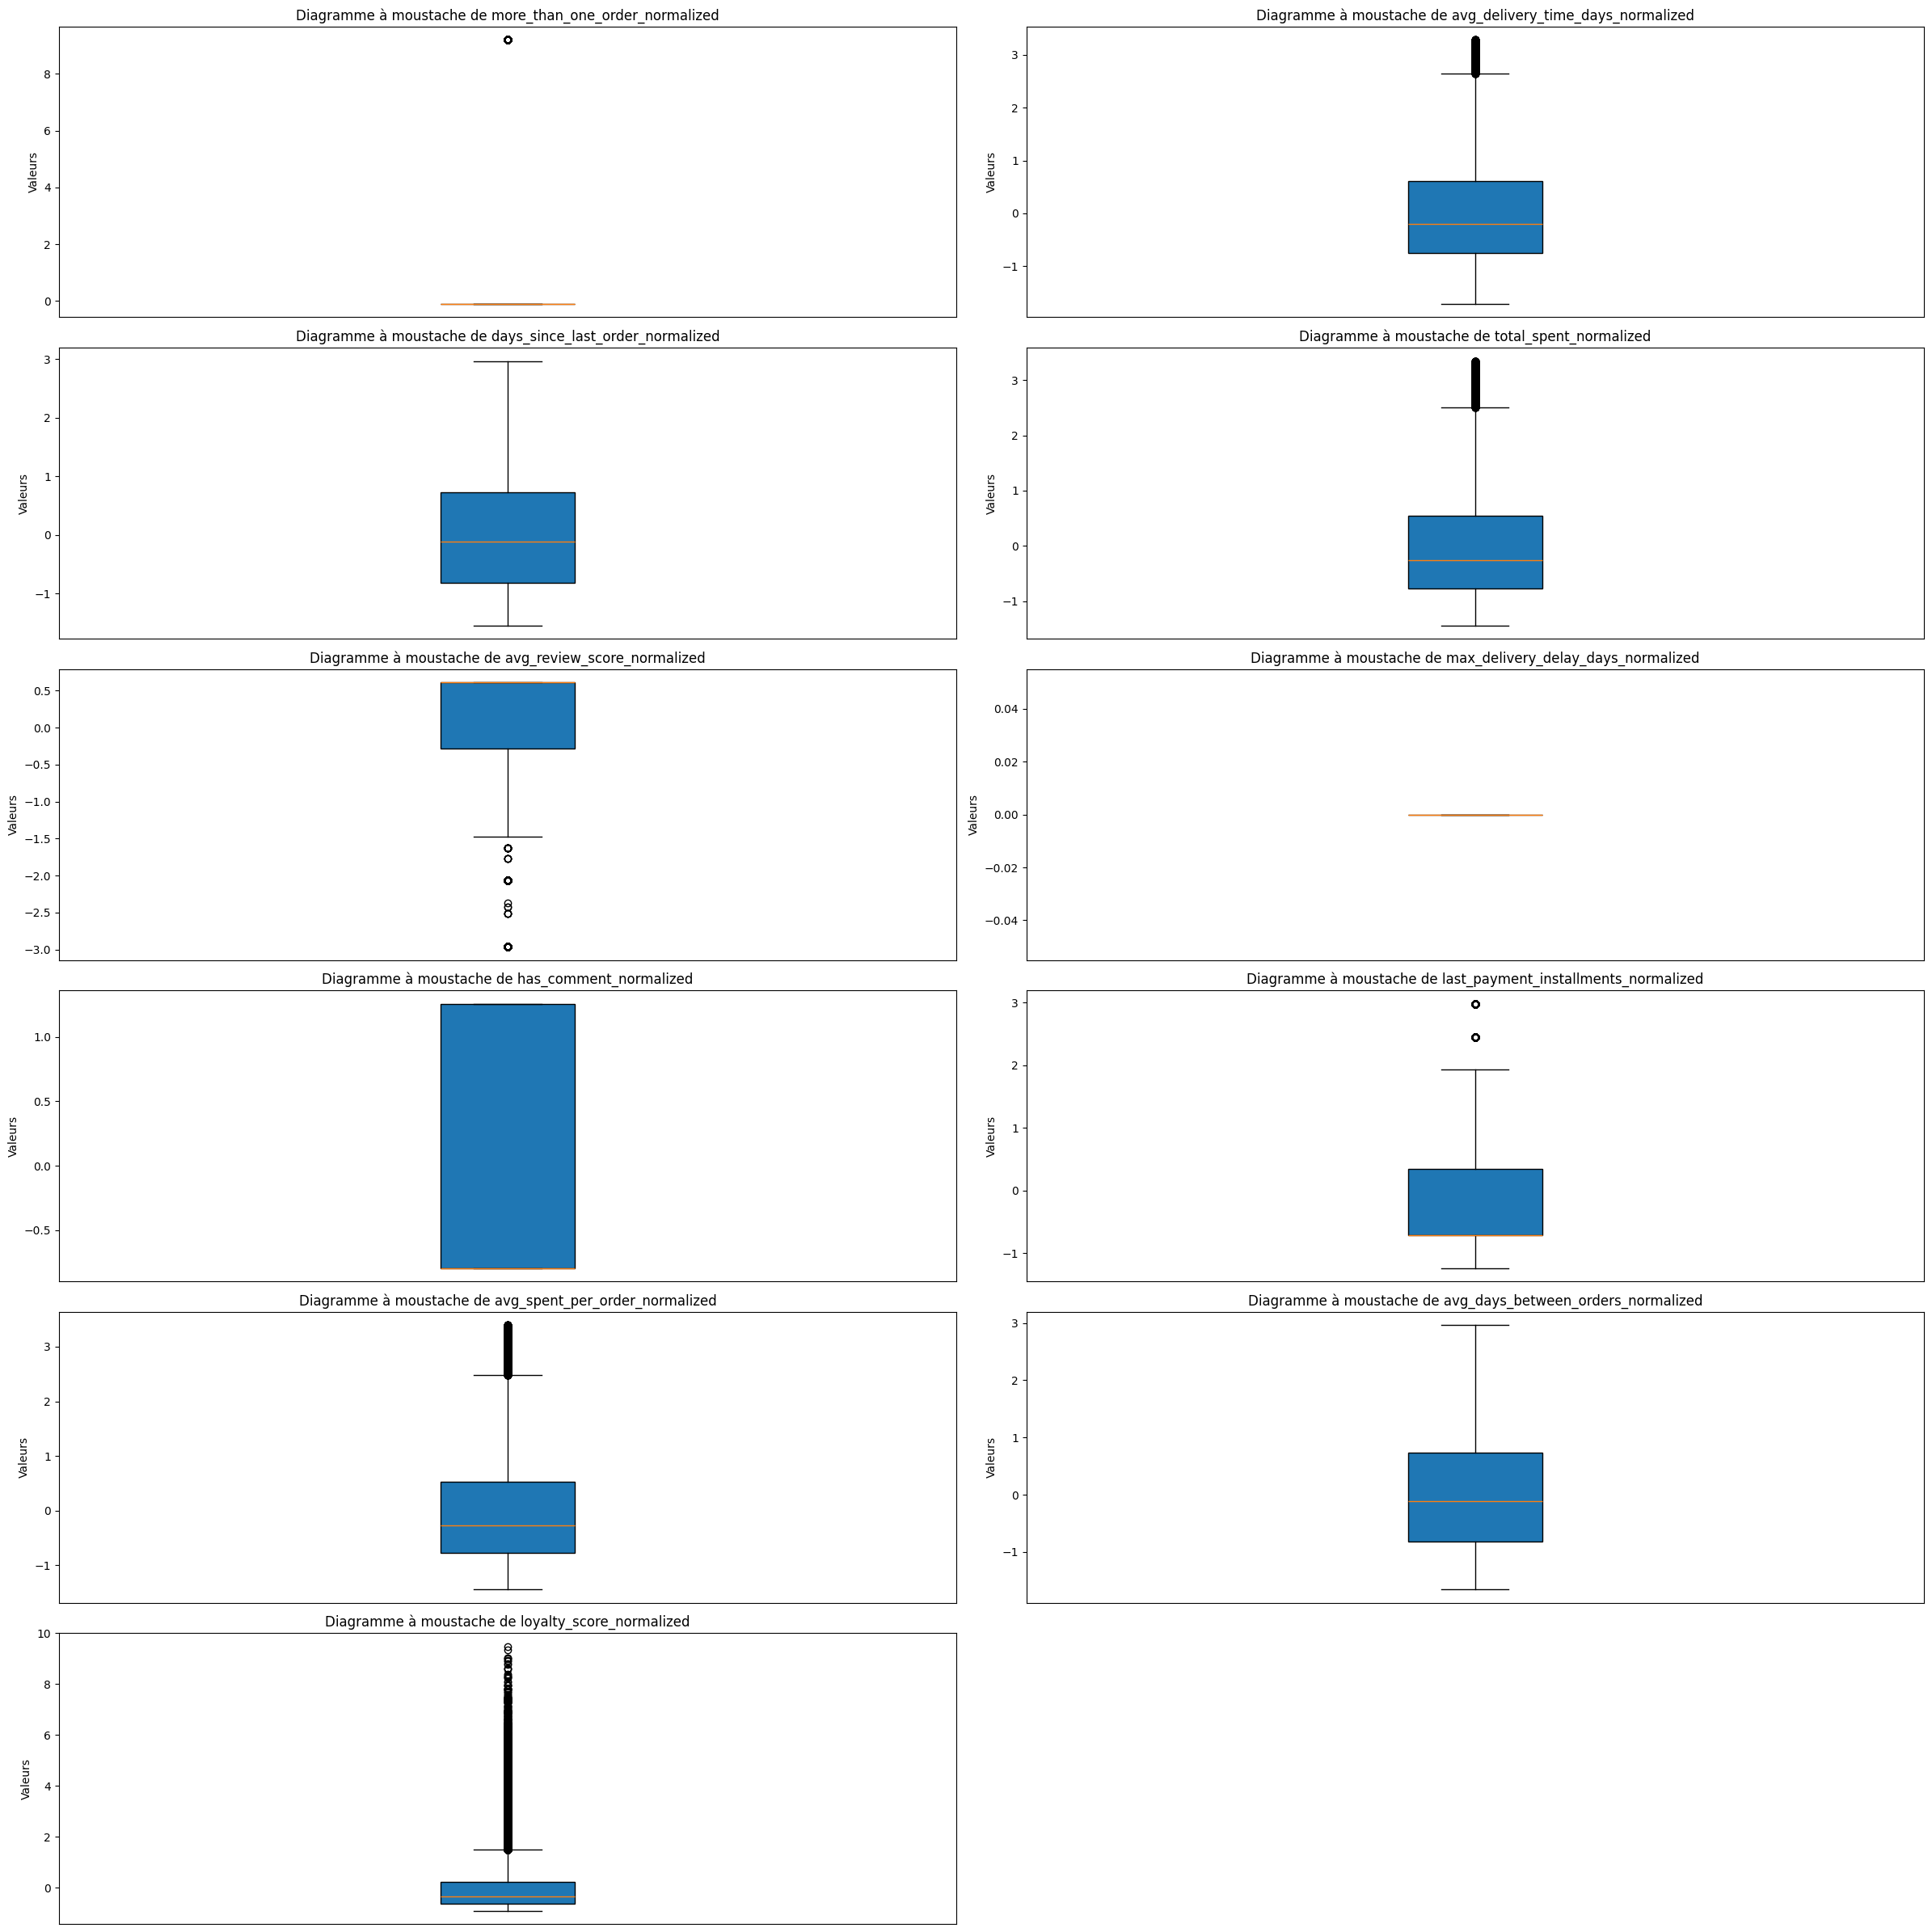

In [11]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['more_than_one_order_normalized', 'avg_delivery_time_days_normalized', 'days_since_last_order_normalized', 'total_spent_normalized', 'avg_review_score_normalized', 'max_delivery_delay_days_normalized', 'has_comment_normalized', 'last_payment_installments_normalized', 'avg_spent_per_order_normalized', 'avg_days_between_orders_normalized', 'loyalty_score_normalized']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

### Les données sont convenablement normalisées. Nous pouvons maintenant tester un clustering.

# Clustering KMeans

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75316 entries, 0 to 75315
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    75316 non-null  object 
 1   avg_delivery_time_days                75316 non-null  float64
 2   days_since_last_order                 75316 non-null  float64
 3   total_spent                           75316 non-null  float64
 4   avg_review_score                      75316 non-null  float64
 5   max_delivery_delay_days               75316 non-null  float64
 6   has_comment                           75316 non-null  int64  
 7   last_payment_type                     75316 non-null  object 
 8   last_payment_installments             75316 non-null  float64
 9   avg_spent_per_order                   75316 non-null  float64
 10  avg_days_between_orders               75316 non-null  float64
 11  loyalty_score  

  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


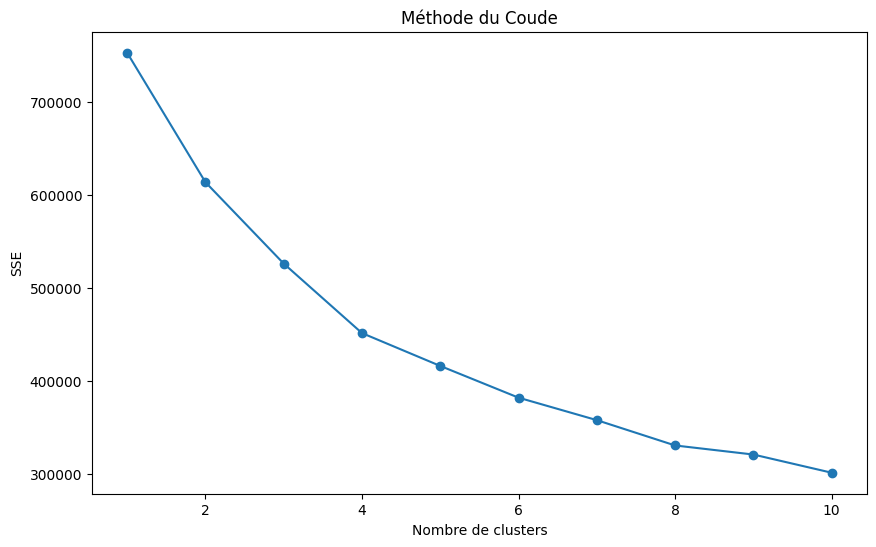

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame

# Étape 1 : Sélection des colonnes pour le clustering
features = df[columns_to_plot]

# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()




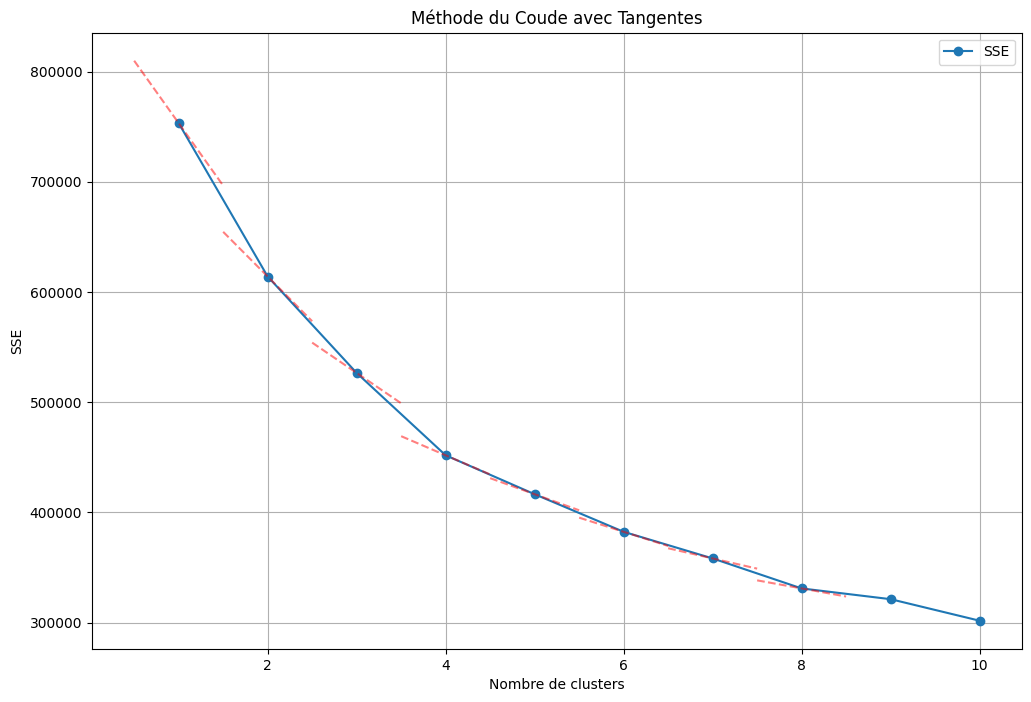

Nombre de clusters: 2, Score: 0.0000
Nombre de clusters: 3, Score: 0.0948
Nombre de clusters: 4, Score: 0.1286
Nombre de clusters: 5, Score: 0.1387
Nombre de clusters: 6, Score: 0.1238
Nombre de clusters: 7, Score: 0.1105
Nombre de clusters: 8, Score: 0.1046
Nombre de clusters: 9, Score: 0.0967


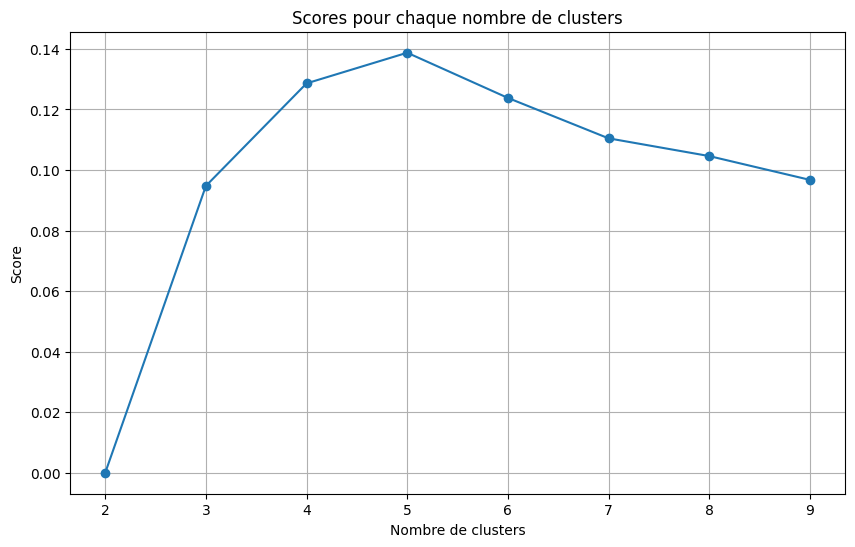

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = []  # Liste pour stocker la somme des distances au carré
k_range = range(1, 11)  # Testez k de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  # Inertia: Somme des distances au carré

# Étape 3 : Calcul des tangentes
def calculate_tangent(x1, y1, x2, y2):
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

tangents = []
for i in range(1, len(sse) - 1):
    slope, intercept = calculate_tangent(k_range[i-1], sse[i-1], k_range[i+1], sse[i+1])
    tangents.append((slope, intercept))

# Étape 4 : Tracer la courbe SSE et les tangentes
plt.figure(figsize=(12, 8))
plt.plot(k_range, sse, marker='o', label='SSE')
plt.title('Méthode du Coude avec Tangentes')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')

# Tracer les tangentes
for i, (slope, intercept) in enumerate(tangents, start=1):
    x = np.array([i-0.5, i+0.5])
    y = slope * x + intercept
    plt.plot(x, y, 'r--', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()

# Étape 5 : Calcul des angles entre les tangentes consécutives
angles = []
for i in range(len(tangents) - 1):
    angle = np.abs(np.arctan(tangents[i][0]) - np.arctan(tangents[i+1][0]))
    angles.append(np.degrees(angle))

import numpy as np

# Calcul des pentes des tangentes
slopes = [tangent[0] for tangent in tangents]

# Normalisation des pentes
normalized_slopes = np.abs(slopes) / max(np.abs(slopes))

# Calcul d'un score qui favorise les pentes proches de l'horizontale et les petits nombres de clusters
scores = [(1 - slope) * (1 / (i + 2)) for i, slope in enumerate(normalized_slopes)]

# Affichage des scores pour chaque nombre de clusters
for k, score in enumerate(scores, start=2):
    print(f"Nombre de clusters: {k}, Score: {score:.4f}")

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(scores) + 2), scores, marker='o')
plt.title('Scores pour chaque nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Selon cette analyse, nous pouvons suggérer que 4 est le bon nombre de clusters, pour éviter la sur-segmentation ou la sous-segmentation (même si 3 semble être un très bon candidat, avoir 4 clusters sera plus précis).

In [15]:
optimal_k = 5

In [16]:
# Étape 3 : Clustering K-Means avec le nombre de clusters choisi

nbClusters = optimal_k

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

In [17]:
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,...,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,avg_spent_per_order_normalized,avg_days_between_orders_normalized,loyalty_score_normalized,cluster_label
40903,8b658cda92ee9a3972c756bd9069ef24,12.655035,585.865035,38.68,5.0,0.0,0,credit_card,1.0,38.68,...,1.935402,-1.032078,0.611074,0.0,-0.794506,-0.709202,-1.027627,1.936275,-0.830642,1
56925,c11274b1c6ddc3cc5c486a2e6cde4026,5.772002,76.847014,45.80,5.0,0.0,1,credit_card,1.0,45.80,...,-1.366746,-0.932209,0.611074,0.0,1.258643,-0.709202,-0.926693,-1.366271,0.031854,0
49908,a9ad87d8be80f58819a2f5872e17d6be,11.754028,553.072442,212.34,5.0,0.0,1,credit_card,1.0,212.34,...,1.722667,1.403778,0.611074,0.0,1.258643,-0.709202,1.434192,1.723514,-0.306753,4
39983,882a0176c20607514679530f9f9d3a6d,10.559873,213.276134,202.16,2.0,0.0,0,credit_card,4.0,202.16,...,-0.481691,1.260987,-2.068609,0.0,-0.794506,0.872177,1.289879,-0.481109,0.618143,2
41757,8e6ab5e2e1df45abe35e2f0eb16ce764,10.157257,255.137627,112.71,4.0,0.0,0,credit_card,2.0,112.71,...,-0.210123,0.006310,-0.282154,0.0,-0.794506,-0.182075,0.021829,-0.209508,-0.212976,0
25552,570d69ff587dc3a79d90851c0bbc80a2,11.310301,163.087442,52.05,4.0,0.0,0,credit_card,1.0,52.05,...,-0.807279,-0.844542,-0.282154,0.0,-0.794506,-0.709202,-0.838092,-0.806736,-0.415759,0
7999,1b18bc689cd5f83c4c9e84c5150a07fe,11.140926,61.094838,164.00,5.0,0.0,0,credit_card,1.0,164.00,...,-1.468935,0.725733,0.611074,0.0,-0.794506,-0.709202,0.748920,-1.468472,3.420907,2
7808,1a6cc7b7b8dde0f4abeb04b2d31dccc6,4.754873,191.909583,35.69,5.0,0.0,0,credit_card,3.0,35.69,...,-0.620302,-1.074017,0.611074,0.0,-0.794506,0.345051,-1.070013,-0.619736,-0.634015,0
58374,c63b5a8f651e04cc4b875d704ce9f0c0,16.379757,338.281528,222.15,5.0,0.0,0,credit_card,5.0,222.15,...,0.329256,1.541378,0.611074,0.0,-0.794506,1.399304,1.573259,0.329935,0.141531,2
58843,c7cd7684e4c3d80651bca76f2e7d9b7b,14.423241,292.199340,41.84,5.0,0.0,1,other,1.0,41.84,...,0.030307,-0.987754,0.611074,0.0,1.258643,-0.709202,-0.982830,0.030951,-0.703862,4


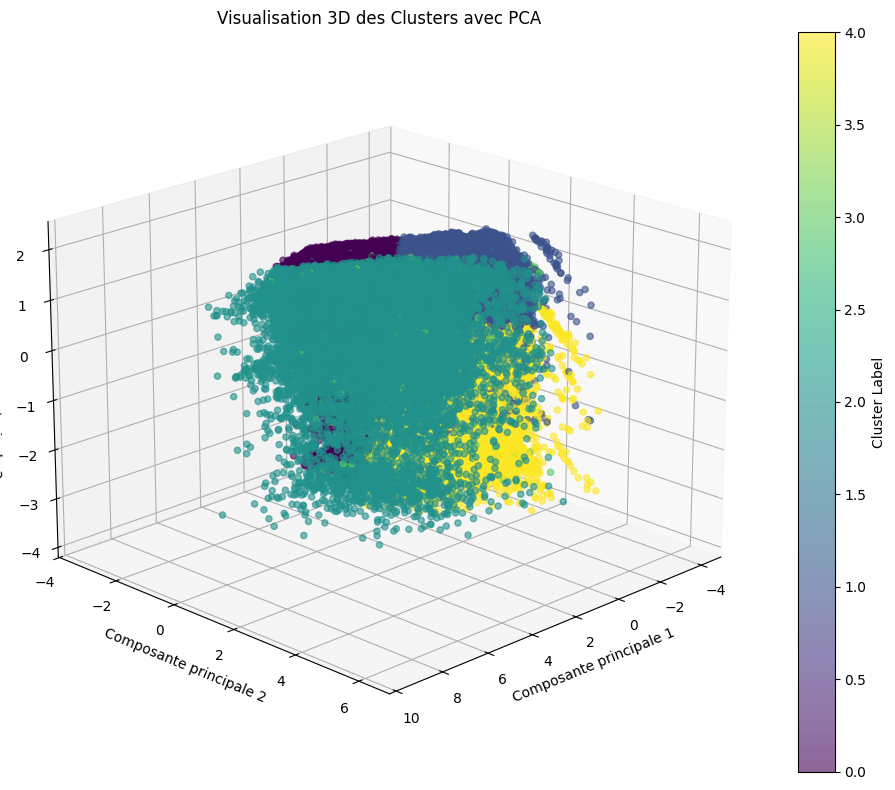

Variance expliquée par chaque composante principale:
PC1: 28.69%
PC2: 20.94%
PC3: 12.15%
Variance totale expliquée: 61.78%


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'clusters' est le résultat de votre clustering KMeans avec le DataFrame 'df' et 'features' vos colonnes normalisées

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=3)  # Réduction à 3 dimensions
reduced_features = pca.fit_transform(features)

# Ajout des composantes principales au DataFrame
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]
df['pca3'] = reduced_features[:, 2]

# Création d'une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster_label'], cmap='viridis', alpha=0.6)

# Ajout des labels et du titre
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.set_title('Visualisation 3D des Clusters avec PCA')

# Ajout d'une barre de couleur
plt.colorbar(scatter, label='Cluster Label')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Affichage de la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

print(f"Variance totale expliquée: {sum(explained_variance_ratio):.2%}")

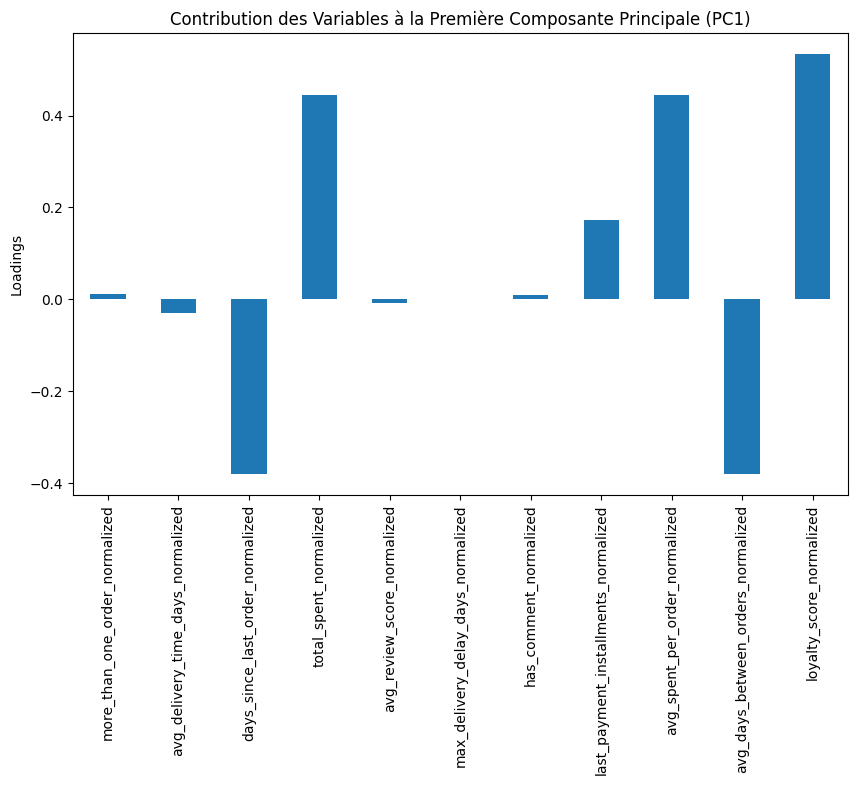

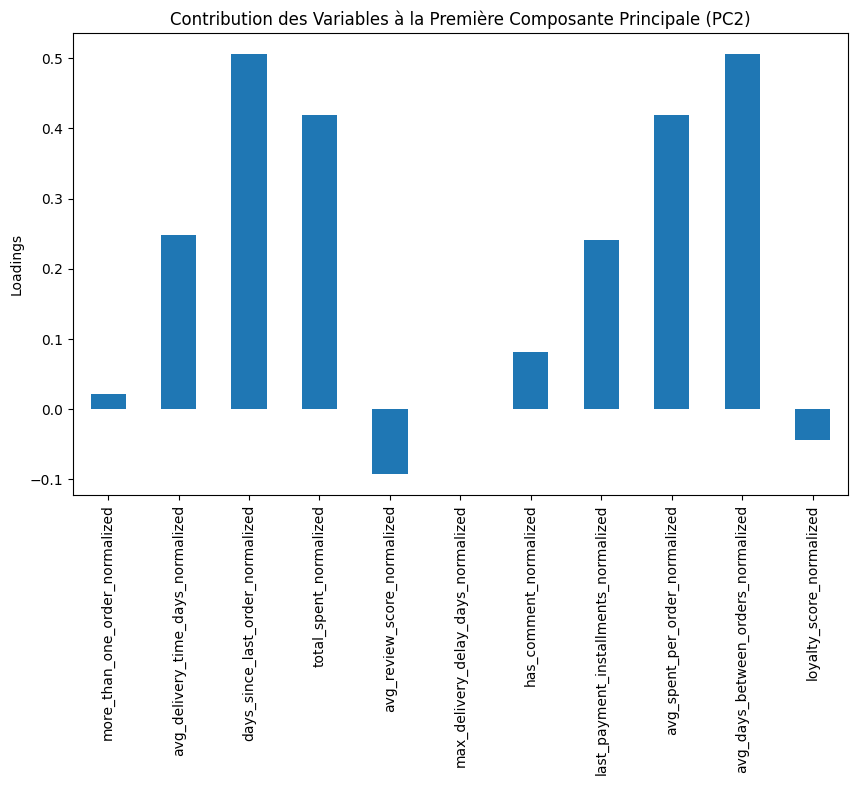

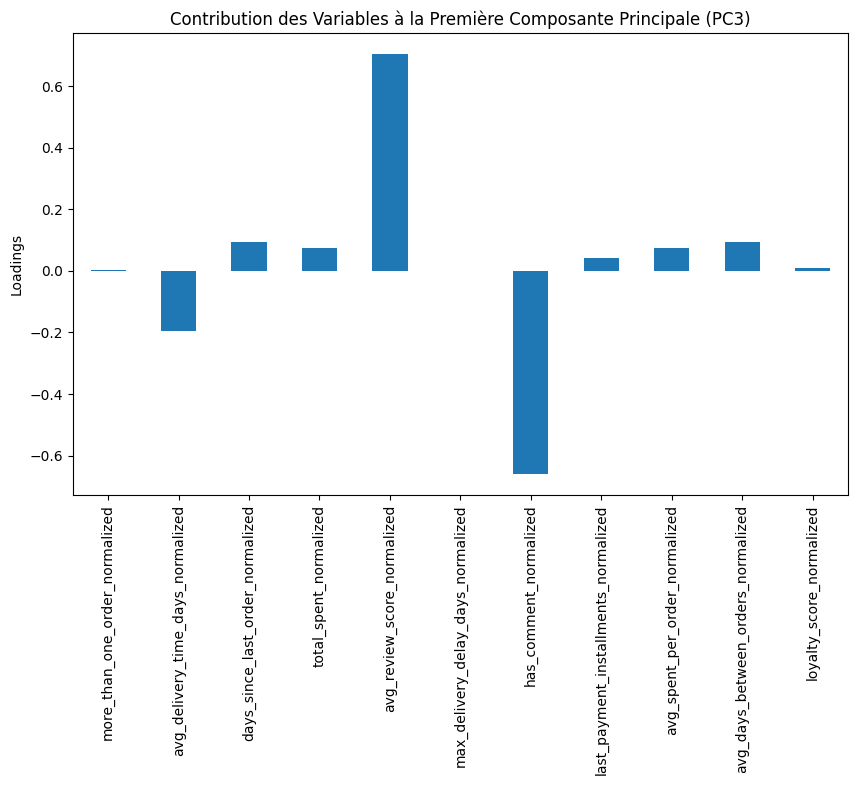

In [19]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features.columns)

# Graphique en barres pour les loadings de la première composante principale
loadings['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC1)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC2 
loadings['PC2'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC2)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC3
loadings['PC3'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC3)')
plt.ylabel('Loadings')
plt.show()

In [20]:
import nbformat as nbf
nbf.__version__

'5.10.4'

In [21]:
import plotly.graph_objects as go
import nbformat

# Supposons que 'loadings' est votre DataFrame
# Conversion de 'loadings' en une matrice si ce n'est pas déjà le cas
# loadings_matrix = loadings.values si 'loadings' est un DataFrame

# Création de la heatmap
fig = go.Figure(data=go.Heatmap(
    z=loadings,  # Utiliser loadings_matrix si nécessaire
    x=loadings.columns,  # Les étiquettes des colonnes pour l'axe X
    y=loadings.index,  # Les étiquettes des lignes pour l'axe Y
    colorscale='Viridis',  # Palette de couleurs
    colorbar=dict(title='Scale'),  # Titre de la barre de couleur
))

# Générer des annotations pour chaque valeur dans la heatmap
annotations = []
for i, row in enumerate(loadings.index):
    for j, col in enumerate(loadings.columns):
        annotations.append(
            dict(
                x=col, y=row,
                text=str(loadings.loc[row, col].round(3)),  # Arrondi à 3 décimales
                xref='x1', yref='y1',
                font=dict(color="white" if loadings.loc[row, col] > loadings.values.mean() else "black", size=12),
                showarrow=False)
        )

# Ajouter les annotations au layout
fig.update_layout(
    annotations=annotations,
    title='Heatmap des Loadings PCA',
    xaxis=dict(title='Composantes'),
    yaxis=dict(title='Variables'),
    xaxis_tickangle=-45
)

fig.show()


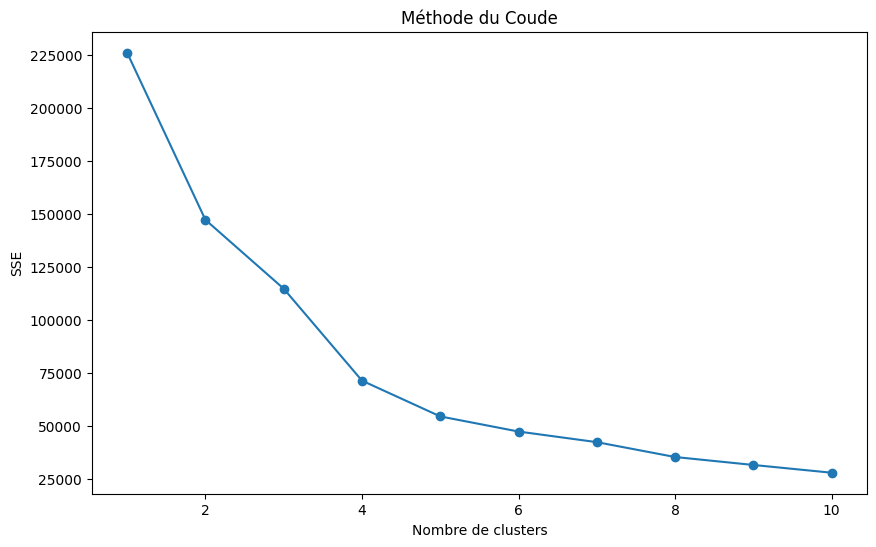

In [22]:
# Do a KMeans clustering with columns has_comment_normalized, avg_review_score_normalized, days_since_last_order_normalized 

# Étape 1 : Sélection des colonnes pour le clustering
features = df[['has_comment_normalized', 'avg_review_score_normalized', 'days_since_last_order_normalized']]
# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()


In [23]:
# On choisit 6 clusters
nbClusters = 5

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,...,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,avg_spent_per_order_normalized,avg_days_between_orders_normalized,loyalty_score_normalized,cluster_label,pca1,pca2,pca3
21157,481b4f4abd0242f301beb442bda1dfc1,18.061771,517.129977,52.59,1.0,0.0,1,credit_card,5.0,52.59,...,0.0,1.258643,1.399304,-0.830437,1.490317,-0.771885,3,-2.050811,1.886244,-2.969695
70612,efaf98dc52d15316e054c656447c7620,7.899479,261.130289,24.77,3.0,0.0,0,credit_card,2.0,24.77,...,0.0,-0.794506,-0.182075,-1.224816,-0.170627,-0.783449,0,-1.397351,-1.281237,-0.444763
22040,4b45c236d7ff26dd4c92c934080970be,13.495174,600.984387,94.22,1.0,0.0,1,credit_card,3.0,94.22,...,0.0,1.258643,0.345051,-0.240287,2.034371,-0.681056,3,-2.050677,2.470729,-2.666649
52373,b1c8ede634a112dfc7b44f08524561f2,11.081968,209.001123,174.20,5.0,0.0,1,credit_card,1.0,174.20,...,0.0,1.258643,-0.709202,0.893516,-0.508845,0.430040,1,1.282373,0.103402,-0.412201
59411,c991d3a00bf798c9383bfad44226e3ad,13.603634,445.669028,206.07,4.0,0.0,0,credit_card,5.0,206.07,...,0.0,-0.794506,1.399304,1.345308,1.026673,-0.177792,2,0.525170,2.594012,0.662328
20931,4758bb880479dc35ec48f38bebcdcfc7,6.009769,109.998356,53.35,5.0,0.0,0,credit_card,1.0,53.35,...,0.0,-0.794506,-0.709202,-0.819664,-1.151182,-0.145946,0,-0.047510,-2.338637,0.738459
12014,28dd1607a5e16ed5458919c2afca6476,19.312959,236.190058,244.52,5.0,0.0,0,credit_card,4.0,122.26,...,0.0,-0.794506,0.872177,0.157210,-0.332441,-0.088470,0,1.287181,1.179896,0.809936
2637,08dad77aba35e08dac6e113a1c01d2c0,5.152407,333.013843,41.78,4.0,0.0,0,other,1.0,41.78,...,0.0,-0.794506,-0.709202,-0.983681,0.295758,-0.732947,2,-1.594046,-0.939958,0.381668
56850,c0cdc5157fd559f00eecc5cf0da5073c,3.828565,625.863935,147.90,5.0,0.0,0,credit_card,8.0,147.90,...,0.0,-0.794506,2.980683,0.520685,2.195791,-0.549936,2,-0.974204,2.976519,1.793478
53653,b654c99744f2fa112d4f7a7762ecfdfe,12.189537,489.280220,228.95,1.0,0.0,1,credit_card,1.0,228.95,...,0.0,1.258643,-0.709202,1.669657,1.309626,-0.168498,3,0.288460,2.994859,-2.519505


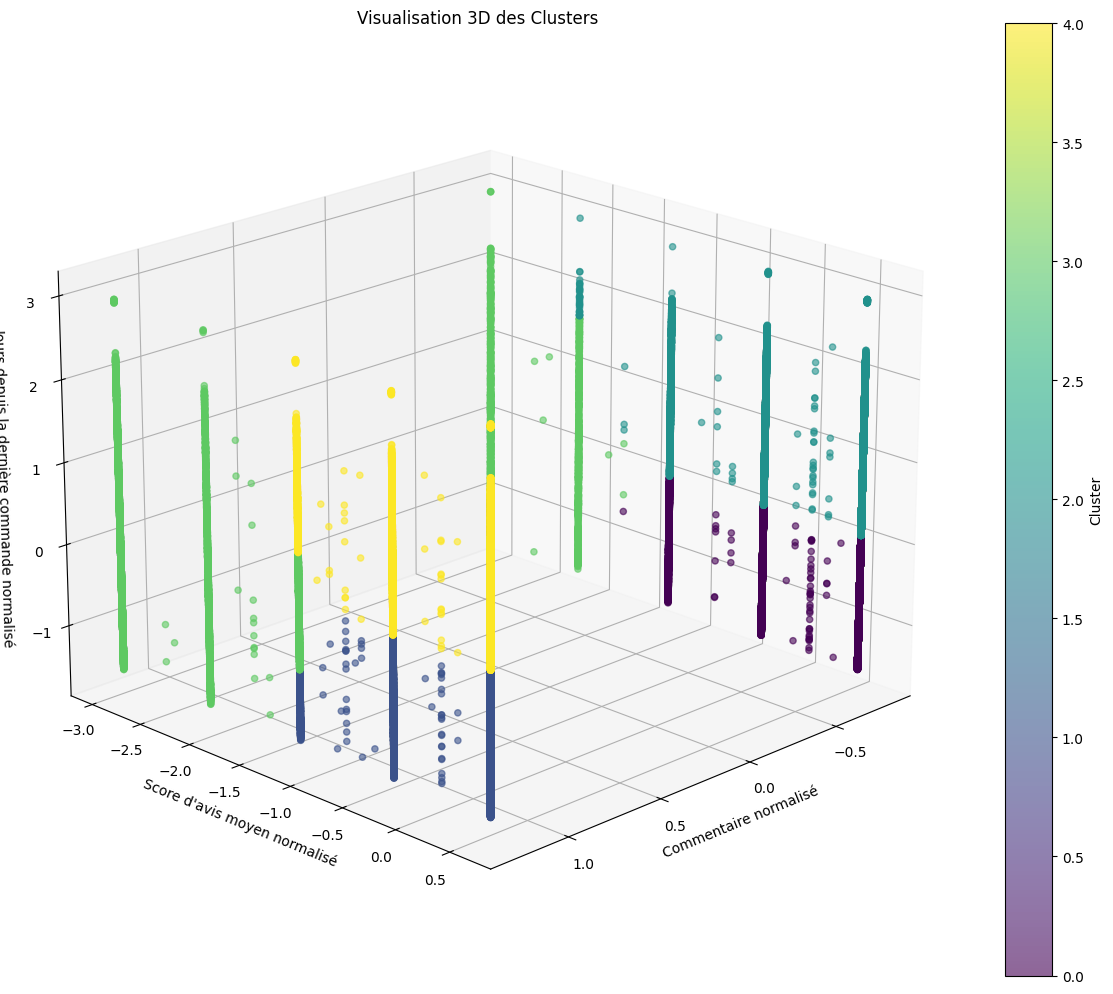

Statistiques des clusters:
               has_comment_normalized  avg_review_score_normalized  \
cluster_label                                                        
0                           -0.794506                     0.276229   
1                            1.258643                     0.334494   
2                           -0.794506                     0.229976   
3                            0.878141                    -2.462932   
4                            1.258643                     0.294978   

               days_since_last_order_normalized  count  
cluster_label                                           
0                                     -0.743847  25765  
1                                     -0.731005  12999  
2                                      0.952193  18994  
3                                      0.009865   7619  
4                                      1.057092   9939  

Caractéristiques des centroides:
         has_comment  avg_review_score  days_sinc

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assurez-vous que df contient les colonnes nécessaires et que le clustering a été effectué

# Création d'une figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(
    df['has_comment_normalized'],
    df['avg_review_score_normalized'],
    df['days_since_last_order_normalized'],
    c=df['cluster_label'],
    cmap='viridis',
    alpha=0.6
)

# Ajout des labels et du titre
ax.set_xlabel('Commentaire normalisé')
ax.set_ylabel('Score d\'avis moyen normalisé')
ax.set_zlabel('Jours depuis la dernière commande normalisé')
ax.set_title('Visualisation 3D des Clusters')

# Ajout d'une barre de couleur
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Statistiques descriptives pour chaque cluster
cluster_stats = df.groupby('cluster_label').agg({
    'has_comment_normalized': 'mean',
    'avg_review_score_normalized': 'mean',
    'days_since_last_order_normalized': 'mean',
    'cluster_label': 'count'
}).rename(columns={'cluster_label': 'count'})

print("Statistiques des clusters:")
print(cluster_stats)

# Caractéristiques des centroides
centroids = kmeans_optimal.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['has_comment', 'avg_review_score', 'days_since_last_order'])
centroid_df.index.name = 'Cluster'

print("\nCaractéristiques des centroides:")
print(centroid_df)

Idées de segmentation (à 8 clusters)

- Cluster 0 : Clients ayant une note de review_score plutôt bonne  et ayant passé une commande il y a longtemps
- Cluster 1 : Clients ayant une note de review_score plutôt bonne et ayant passé une commande récemment
- Cluster 2 : Clients ayant une note de review_score élevée et ayant passé une commande récemment
- Cluster 3 : Clients ayant une note de review_score très mauvaise et ayant passé une commande récemment ou il y a longtemps

In [25]:
# give names to the clusters
cluster_names = {
    0: 'Clients satisfaits à relancer',
    1: 'Clients à fidéliser en priorité',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
}

# DBSCAN

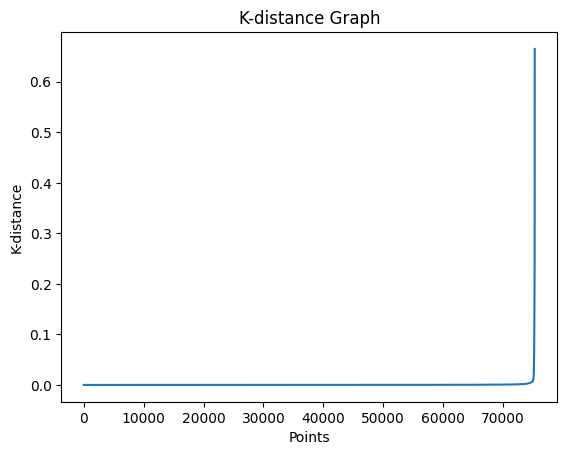

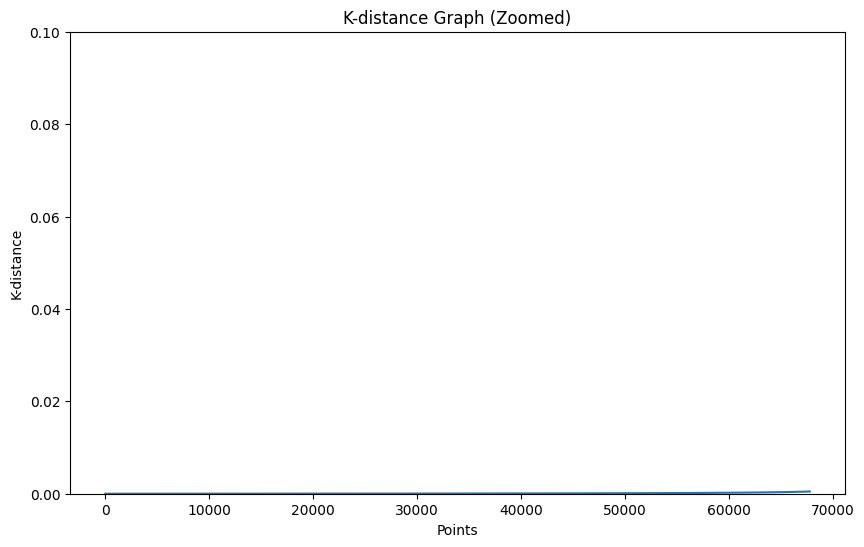

Quelques valeurs de k-distance à considérer:
1% percentile: 0.00000
5% percentile: 0.00000
10% percentile: 0.00001


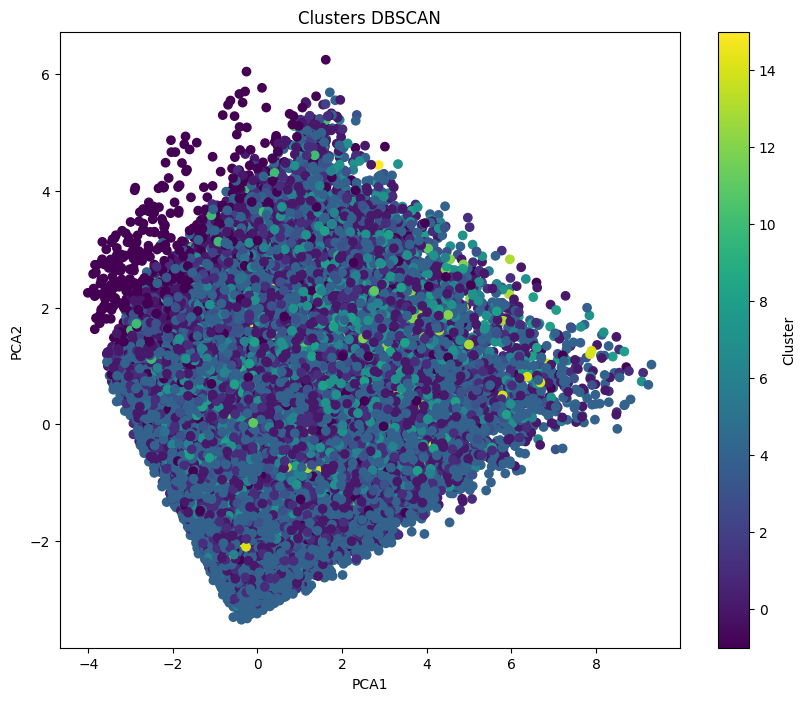

Nombre estimé de clusters: 16
Nombre estimé de points de bruit: 2757


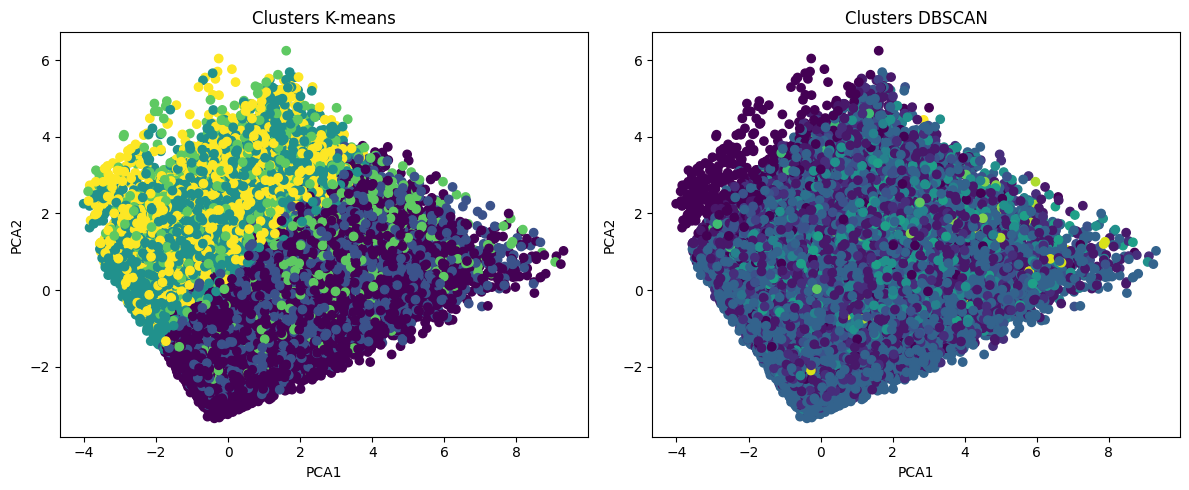

In [26]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Supposons que 'features' contient vos données normalisées

# Étape 1: Trouver le epsilon optimal
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(distances[:int(len(distances)*0.9)])  # Plot only the first 90% of points
plt.title('K-distance Graph (Zoomed)')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.ylim(0, 0.1)  # Limit y-axis to 0.1
plt.show()

print("Quelques valeurs de k-distance à considérer:")
print(f"1% percentile: {np.percentile(distances, 1):.5f}")
print(f"5% percentile: {np.percentile(distances, 5):.5f}")
print(f"10% percentile: {np.percentile(distances, 10):.5f}")

# Choisissez le point d'inflexion comme epsilon
epsilon = 0.1 

# Étape 2: Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=100)
dbscan_clusters = dbscan.fit_predict(features)

# Ajouter les labels DBSCAN au DataFrame
df['dbscan_cluster'] = dbscan_clusters

# Étape 3: Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# Étape 4: Analyser les résultats
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f'Nombre estimé de clusters: {n_clusters}')
print(f'Nombre estimé de points de bruit: {n_noise}')

# Comparaison avec K-means
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_label'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(122)
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

In [27]:
# Tu as déjà les colonnes suivantes, donc cette étape est probablement déjà faite.
df['Recency'] = df['days_since_last_order']
df['Frequency'] = df['more_than_one_order']
df['Monetary'] = df['total_spent']


In [28]:
# Calcul des percentiles pour 'Recency' (où un score bas est bon)
percentiles_r = df['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Calcul des percentiles pour 'Frequency' et 'Monetary' (où un score élevé est bon)
percentiles_f = df['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).values
percentiles_m = df['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Fonction pour attribuer les scores basés sur les percentiles
def assign_score(value, percentiles, high_is_good=True):
    if high_is_good:
        if value <= percentiles[0]:
            return 1
        elif value <= percentiles[1]:
            return 2
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 4
        else:
            return 5
    else:
        if value <= percentiles[0]:
            return 5
        elif value <= percentiles[1]:
            return 4
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 2
        else:
            return 1



In [29]:
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,...,avg_days_between_orders_normalized,loyalty_score_normalized,cluster_label,pca1,pca2,pca3,dbscan_cluster,Recency,Frequency,Monetary
137,006ec5b170182812131c7d9b219c036f,4.189954,366.232627,61.77,5.0,0.0,0,credit_card,1.0,61.77,...,0.511284,-0.661759,2,-1.470608,-0.613224,1.127631,4,366.232627,0,61.77
45813,9bddac3157e4f2e6f5dfd21753c70898,6.875671,369.001887,62.00,5.0,0.0,0,credit_card,1.0,62.00,...,0.529251,-0.662811,2,-1.496081,-0.474484,1.038785,4,369.001887,0,62.00
64492,daa831b62abae75aba44e1de6242eebe,9.880718,123.161620,63.46,5.0,0.0,0,credit_card,2.0,63.46,...,-1.065778,-0.095641,0,0.111475,-1.838373,0.664644,4,123.161620,0,63.46
42169,8fcd817e31a66f647309351044617cb3,7.294907,117.932454,86.66,1.0,0.0,1,credit_card,3.0,86.66,...,-1.099705,0.263508,3,0.772221,-1.104968,-3.051003,7,117.932454,0,86.66
49664,a8d117a7922a4e2b8791ef94c9990d6f,7.032639,121.165729,61.38,5.0,0.0,0,credit_card,3.0,61.38,...,-1.078727,-0.109965,0,0.193184,-1.873476,0.778288,4,121.165729,0,61.38
43875,95a19b9ba20757bfb34f33bd877f2a7b,19.984919,236.962187,122.50,5.0,0.0,0,credit_card,2.0,122.50,...,-0.327432,-0.089566,0,0.240941,0.049316,0.577502,4,236.962187,0,122.50
11216,262ab6343507e1bae6a81a9d8156e308,4.276354,310.385301,24.68,2.0,0.0,1,other,1.0,24.68,...,0.148943,-0.808604,3,-1.698043,-0.993862,-2.264672,9,310.385301,0,24.68
27343,5d015eb911244b84cf8b5aedc7fd6f04,2.267477,281.379688,109.79,5.0,0.0,0,credit_card,1.0,109.79,...,-0.039248,-0.297561,0,-0.245699,-0.703756,1.192901,4,281.379688,0,109.79
12476,2a7dd663caca8ff00efe737d51a5aeaf,19.455301,278.347558,180.18,3.0,0.0,1,credit_card,3.0,180.18,...,-0.058920,0.125413,3,1.003156,1.428327,-1.822455,8,278.347558,0,180.18
59054,c86ac97751bb46bf642e75bf8455f199,15.305914,407.236910,64.05,5.0,0.0,0,credit_card,3.0,64.05,...,0.777323,-0.680431,2,-1.531401,0.425057,0.843221,4,407.236910,0,64.05


In [30]:
# Ajoutez ces imports au début du notebook si ce n'est pas déjà fait
import joblib
from datetime import timedelta

# Après votre meilleur modèle KMeans (supposons que c'est kmeans_optimal)
# Sauvegarde du meilleur modèle
joblib.dump(kmeans_optimal, 'kmeans_optimal.joblib')

# Création d'un DataFrame avec les données dégradées (décalées d'un an)
df_degraded = df.copy()

# Vérifiez si 'days_since_last_order' existe, sinon utilisez une autre colonne pertinente
if 'days_since_last_order' in df_degraded.columns:
    df_degraded['days_since_last_order'] += 365
else:
    print("Attention : La colonne 'days_since_last_order' n'existe pas. Veuillez vérifier vos colonnes.")

# Recalcul des features normalisées pour les données dégradées
features_to_normalize = columns_to_plot

# Ajoutez 'days_since_last_order' à la liste si elle existe
if 'days_since_last_order' in df_degraded.columns:
    features_to_normalize.append('days_since_last_order')

for feature in features_to_normalize:
    if feature in df_degraded.columns:
        df_degraded[f'{feature}_normalized'] = (df_degraded[feature] - df_degraded[feature].min()) / (df_degraded[feature].max() - df_degraded[feature].min())
    else:
        print(f"Attention : La colonne '{feature}' n'existe pas. Elle ne sera pas normalisée.")

# Sélection des features normalisées pour le clustering dégradé
features_degraded = [f'{feature}_normalized' for feature in features_to_normalize if f'{feature}_normalized' in df_degraded.columns]
print(features_degraded)
X_degraded = df_degraded[features_degraded]

# Remove NAN values from X_degraded
X_degraded = X_degraded.dropna()

# Création et entraînement du modèle KMeans dégradé
kmeans_degraded = KMeans(n_clusters=6, random_state=42)
kmeans_degraded.fit(X_degraded)

# Sauvegarde du modèle dégradé
joblib.dump(kmeans_degraded, 'kmeans_degraded.joblib')

print("Les modèles optimal et dégradé ont été sauvegardés.")
print("Features utilisées pour le modèle dégradé :", features_degraded)

['more_than_one_order_normalized_normalized', 'avg_delivery_time_days_normalized_normalized', 'days_since_last_order_normalized_normalized', 'total_spent_normalized_normalized', 'avg_review_score_normalized_normalized', 'max_delivery_delay_days_normalized_normalized', 'has_comment_normalized_normalized', 'last_payment_installments_normalized_normalized', 'avg_spent_per_order_normalized_normalized', 'avg_days_between_orders_normalized_normalized', 'loyalty_score_normalized_normalized', 'days_since_last_order_normalized']


ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by KMeans.